In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
df = pd.read_excel('Data Kelembapan rata-rata.xlsx')
df

,Tanggal,Kelembapan Rata-rata (%)
0,2005-01-01,80
1,2005-01-02,74
2,2005-01-03,79
3,2005-01-04,82
4,2005-01-05,86
...,...,...
998,2007-09-26,60
999,2007-09-27,60
1000,2007-09-28,62
1001,2007-09-29,68


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Tanggal                   1003 non-null   datetime64[ns]
 1   Kelembapan Rata-rata (%)  1003 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.8 KB


In [4]:
df['Kelembapan Rata-rata (%)'].describe()

count    1003.000000
mean       80.740778
std         6.567369
min        47.000000
25%        76.000000
50%        81.000000
75%        86.000000
max        98.000000
Name: Kelembapan Rata-rata (%), dtype: float64

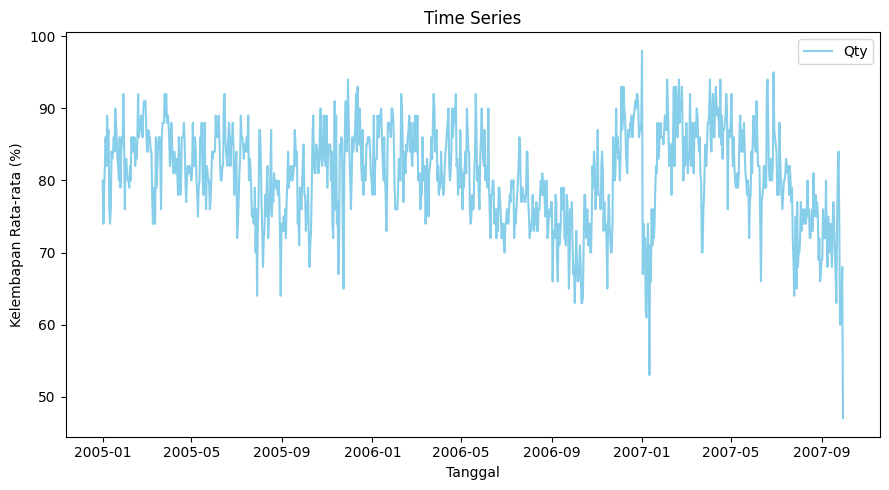

In [5]:
fig, ax = plt.subplots(figsize=(9, 5))
plt.plot(df['Tanggal'], df['Kelembapan Rata-rata (%)'], color='skyblue', label='Qty')
plt.xlabel('Tanggal')
plt.ylabel('Kelembapan Rata-rata (%)')
plt.title('Time Series')
plt.legend()
plt.tight_layout()
plt.show()

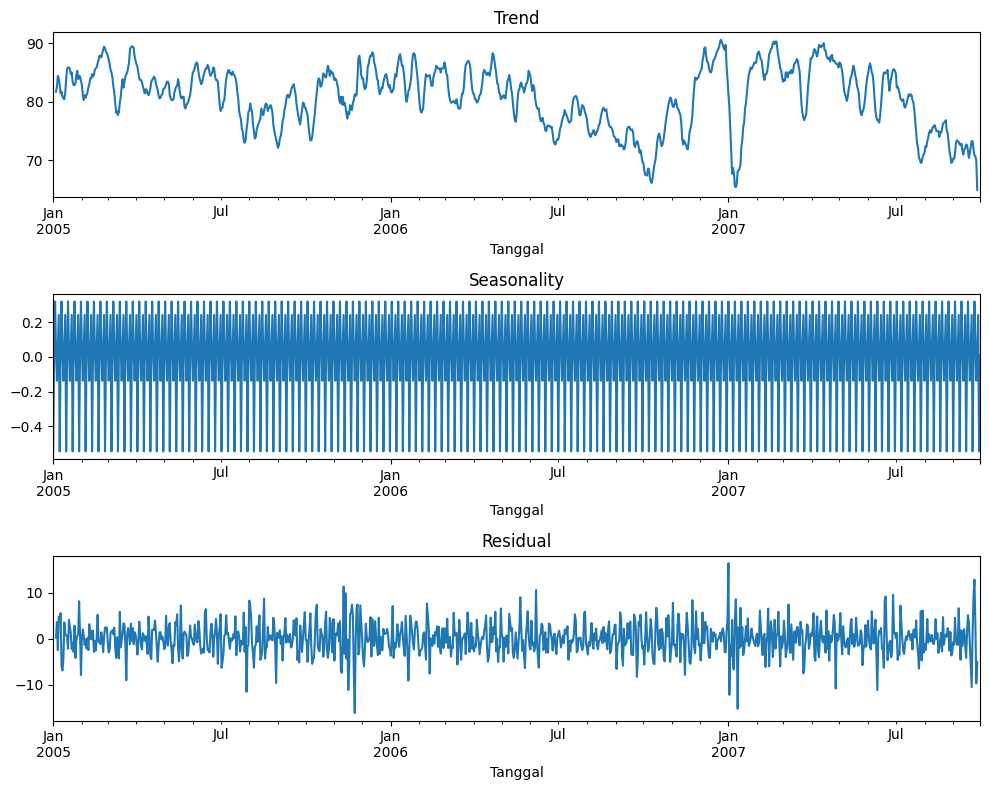

In [7]:
# Melakukan dekomposisi data
decomposed = seasonal_decompose(df.set_index('Tanggal'))

# Menampilkan plot tren menggunakan dekomposisi
plt.figure(figsize=(10, 8))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residual')

plt.tight_layout()
plt.show()


In [ ]:
# Melakukan uji stasioneritas menggunakan Augmented Dickey-Fuller (ADF) test
result = adfuller(df['Kelembapan Rata-rata (%)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

if result[1] <= 0.05:
  print("\nThe data is stationary")
else:
  print("\nThe data is non-stationary")


ADF Statistic: -3.8205635187467624
p-value: 0.0027037932062448293
Critical Values:
	1%: -3.436979275944879
	5%: -2.8644668170148058
	10%: -2.5683283824496153

The data is stationary


<Figure size 1200x600 with 0 Axes>

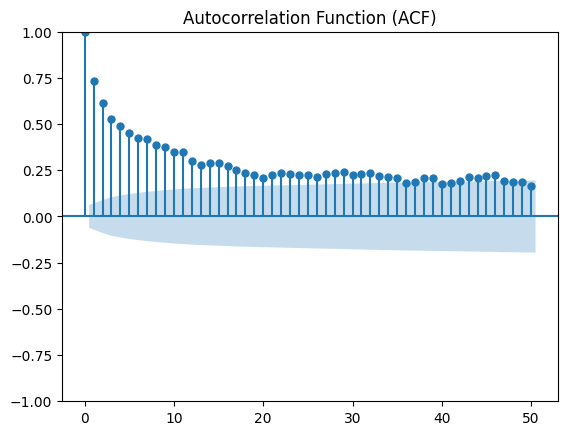

<Figure size 1200x600 with 0 Axes>

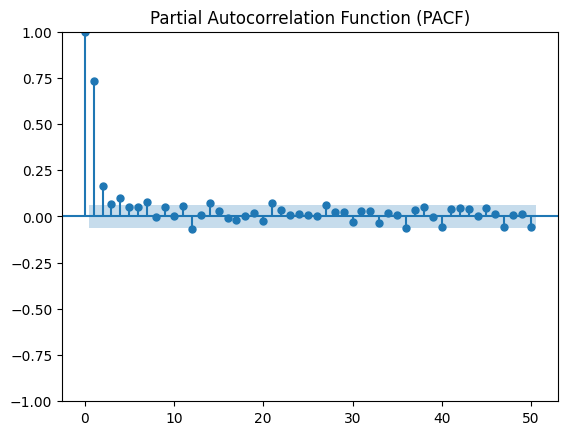

In [ ]:
# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(df['Kelembapan Rata-rata (%)'], lags=50, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df['Kelembapan Rata-rata (%)'], lags=50, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()
